In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

import tensorflow_addons as tfa
import numpy as np
import random


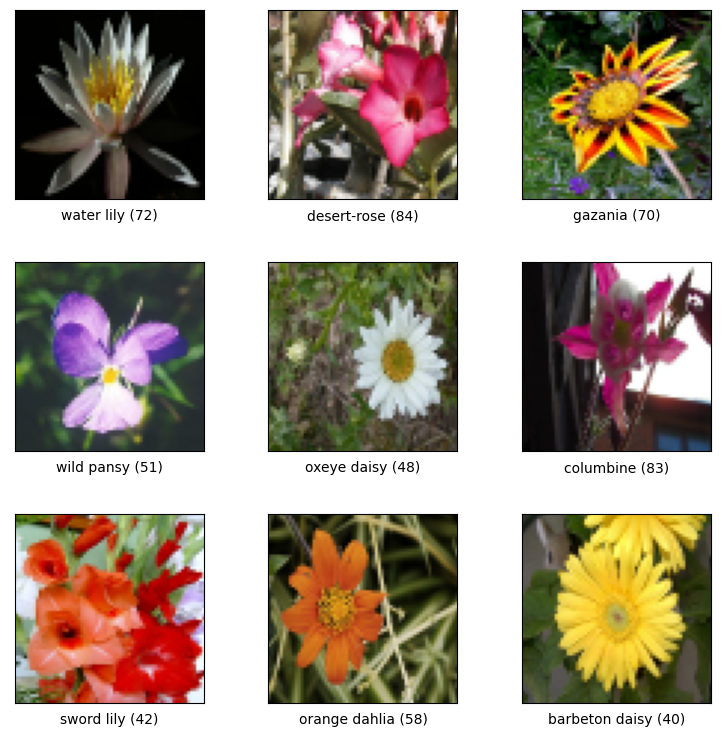

In [15]:


#Load the training and testing dataset
#TODO Validation dataset
(ds_train, ds_test, ds_val), ds_info = tfds.load('oxford_flowers102',
                                            split=['train', 'test', 'validation'],
                                            with_info=True,
                                            shuffle_files=True,
                                            as_supervised=True)




#This gets the images ready
shape = (128, 128, 3)
big_shape = (200,200,3)
small_shape = (64, 64, 3)
n_labels = 102
def normalize_img(img, label):
    img = tf.image.resize(img,shape[:2])
    img = tf.cast(img, tf.float32) / 255


    return (img, label)


def resize_img(img, label):
    img = tf.image.resize(img,small_shape[:2])
    return (img, label)


def randomize_img1(img, label):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_brightness(img,0.15)
    img = tf.image.random_contrast(img,0.5,0.9)
    img = tf.image.random_saturation(img, 0.5,0.9)
    img = tf.image.random_hue(img, 0.2)
    return (img, label)


def randomize_img2(img, label):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_saturation(img, 0.4,0.9)
    return (img, label)


def randomize_img3(img, label):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_brightness(img,0.15)
    img = tf.image.random_contrast(img,0.3,0.9)
    return (img, label)


def randomize_saturation(img, label):
    img = tf.image.random_saturation(img, 0.5,0.9)
    img = tf.image.random_hue(img, 0.025)
    return (img, label)




def randomize_brightness(img, label):
    img = tf.image.random_brightness(img,0.15)
    img = tf.image.random_contrast(img,0.3,0.9)
    return (img, label)


def random_flip_img(img, label):
    img = tf.image.random_flip_left_right(img)
    return (img, label)


def rotate_img(img, label):
    img = tfa.image.rotate(img, angles=0.5)
    return (img, label)


def random_crop(img, label):
    img = tf.image.resize(img,big_shape[:2])
    img = tf.image.random_crop(img, (128,128,3))
    return (img, label)


def random_move_img(img, label):
    img = tfa.image.rotate(img, angles=random.uniform(-0.5, 0.5))
    img = tfa.image.translate(img, [np.random.random()*30-15,np.random.random()*30-15])
    return (img, label)


def random_test(img, label):
   
    return (img, label)


def random_cutout(img, label):
    cutout_size = random.randint(16,48)
    n_cutouts = random.randint(2,5)
    for _ in range(n_cutouts):
        # image.cutout needs a 4d tensor but img is a 3d tensor
        img = tf.expand_dims(img, 0)
        img = tfa.image.cutout(img, 32,
                               [random.randint(0, shape[0]), random.randint(0, shape[1])])
        img = img[0,]
    return img, label


def random_image_warp(img, label):
    n_warp_points = 25
    offset = 5
   
    offsets = tf.random.uniform(shape = [n_warp_points, 2], minval = -offset, maxval = offset)
    src_points = tf.random.uniform(shape = [n_warp_points, 2], maxval = shape[0])
    dest_points = src_points + offsets
    img, flow = tfa.image.sparse_image_warp([img], [src_points], [dest_points])
    img = img[0,]
    return img, label






def random_randomthings(img, label):
    for i in range (0,random.randint(1,4)):
        random_value = random.randint(0,6)
        if random_value == 0:
            img, label = random_flip_img(img, label)
        elif random_value == 1:
            img, label = random_move_img(img, label)
        elif random_value == 2:
            img, label = randomize_brightness(img, label)
        elif random_value == 3:
            img, label = randomize_brightness(img, label)
        elif random_value == 4:
            img, label = randomize_saturation(img, label)
        elif random_value == 5:
            img =  tf.image.random_contrast(img,0.3,0.9)
        # elif random_value == 6:
        #     img, label = random_crop(img, label)


    return (img, label)




AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 128
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)






#Random Brightness
ds_brightness_train = ds_train.map(randomize_brightness)


#Random Brightness and crop
ds_brightness_crop_train = ds_train.map(randomize_brightness)
ds_brightness_crop_train = ds_brightness_crop_train.map(random_crop)
#Random Saturation
ds_saturation_train = ds_train.map(randomize_saturation)


#Random Saturation and crop
ds_saturation_crop_train = ds_train.map(randomize_saturation)
ds_saturation_crop_train = ds_saturation_crop_train.map(random_crop)


#Random Crop
ds_crop_train = ds_train.map(random_crop)


#Random Move
ds_move_train = ds_train.map(random_move_img)


#Random cutout
ds_cutout_train = ds_train.map(random_cutout)


#Random Warp
ds_warp_train = ds_train.map(random_image_warp)


#Random lots
ds_random_train = ds_train.map(randomize_brightness)
ds_random_train = ds_random_train.map(random_image_warp)
ds_random_train = ds_random_train.map(random_move_img)


#Random lotsV2
ds_random2_train = ds_train.map(randomize_saturation)
ds_random2_train = ds_random2_train.map(random_image_warp)
ds_random2_train = ds_random2_train.map(random_cutout)
ds_random2_train = ds_random2_train.map(random_move_img)


#Random lots v3
ds_random3_train = ds_train.map(randomize_saturation)
ds_random3_train = ds_random3_train.map(random_image_warp)
ds_random3_train = ds_random3_train.map(random_cutout)
ds_random3_train = ds_random3_train.map(random_move_img)
ds_random3_train = ds_random3_train.map(randomize_saturation)


#Random Lots v4
ds_random4_train = ds_train.map(randomize_brightness)
ds_random4_train = ds_random4_train.map(random_crop)
ds_random4_train = ds_random4_train.map(random_move_img)


#Random Lots v5
ds_random5_train = ds_train.map(randomize_brightness)
ds_random5_train = ds_random5_train.map(random_crop)
ds_random5_train = ds_random5_train.map(random_move_img)
ds_random5_train = ds_random5_train.map(random_cutout)


#Random lots v6
ds_random6_train = ds_train.map(randomize_saturation)
ds_random6_train = ds_random6_train.map(random_move_img)
ds_random6_train = ds_random6_train.map(randomize_saturation)
ds_random6_train = ds_random6_train.map(random_image_warp)
ds_random6_train = ds_random6_train.map(random_crop)




ds_train = ds_train.concatenate(ds_brightness_train)
ds_train = ds_train.concatenate(ds_brightness_crop_train)
ds_train = ds_train.concatenate(ds_saturation_train)
ds_train = ds_train.concatenate(ds_saturation_crop_train)
ds_train = ds_train.concatenate(ds_crop_train)
ds_train = ds_train.concatenate(ds_move_train)
ds_train = ds_train.concatenate(ds_cutout_train)
ds_train = ds_train.concatenate(ds_random_train)
ds_train = ds_train.concatenate(ds_random2_train)
ds_train = ds_train.concatenate(ds_random3_train)
ds_train = ds_train.concatenate(ds_random4_train)
ds_train = ds_train.concatenate(ds_random5_train)
ds_train = ds_train.concatenate(ds_random6_train)


ds_flip_train = ds_train.map(random_flip_img)
ds_train = ds_train.concatenate(ds_flip_train)
ds_train = ds_train.concatenate(ds_train)
ds_train = ds_train.map(resize_img)


tfds.visualization.show_examples(ds_train, ds_info)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(1000)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)


ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test =ds_test.map(resize_img)
ds_test = ds_test.batch(BATCH_SIZE)
ds_test = ds_test.prefetch(AUTOTUNE)


ds_val = ds_val.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_val =ds_val.map(resize_img)
ds_val = ds_val.cache()
ds_val = ds_val.shuffle(1000)
ds_val = ds_val.batch(BATCH_SIZE)
ds_val = ds_val.prefetch(AUTOTUNE)



In [16]:
print(ds_train.cardinality().numpy() * BATCH_SIZE)

57216


In [17]:
#Making the NN model
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=shape),
#     tf.keras.layers.BatchNormalization(),
    
#     tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu"),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.MaxPooling2D((2, 2), strides=2),
#     tf.keras.layers.Dropout(0.25),

#     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Dropout(0.25),

#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256, activation="relu"),
#     tf.keras.layers.Dense(n_labels, activation="softmax")]
# )

#Making the NN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=small_shape),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    #tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.8),

    # tf.keras.layers.Conv2D(128, (3,3), padding='same', activation="relu"),
    # tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    # tf.keras.layers.Dropout(0.8),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(n_labels, activation="softmax")]
)

#Learning rate scheduler (EXPLAIN THIS)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)


model.compile(
    optimizer=keras.optimizers.Adam(lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 16384)            

In [19]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:


#Train the model 
history = model.fit(
    ds_train,
    epochs=30,
    validation_data=ds_val)

Epoch 1/30


c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend.py:5586: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits, "Softmax", "sparse_categorical_crossentropy"


 47/447 [==>...........................] - ETA: 14:15 - loss: 4.6113 - accuracy: 0.0173

KeyboardInterrupt: 

InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\traitlets\config\application.py", line 1043, in launch_instance
      app.start()
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\asyncio\base_events.py", line 541, in run_forever
      self._run_once()
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\asyncio\base_events.py", line 1786, in _run_once
      handle._run()
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\asyncio\events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py", line 387, in do_execute
      cell_id=cell_id,
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 2976, in run_cell
      raw_cell, store_history, silent, shell_futures, cell_id
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3258, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\tomfe\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\tomfe\AppData\Local\Temp\ipykernel_23604\97712741.py", line 7, in <module>
      test_loss, test_acc = model.evaluate(ds_test, verbose=2)
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 2040, in evaluate
      tmp_logs = self.test_function(iterator)
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 1820, in test_function
      return step_function(self, iterator)
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 1804, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 1792, in run_step
      outputs = model.test_step(data)
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 1758, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\training.py", line 1083, in compute_loss
      y, y_pred, sample_weight, regularization_losses=self.losses
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\losses.py", line 284, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\losses.py", line 2103, in sparse_categorical_crossentropy
      axis=axis,
    File "c:\Users\tomfe\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend.py", line 5634, in sparse_categorical_crossentropy
      labels=target, logits=output
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
logits and labels must have the same first dimension, got logits shape [512,102] and labels shape [128]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_test_function_12738]

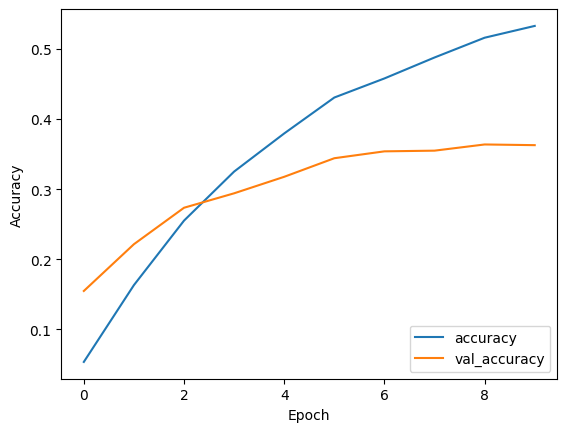

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(ds_test, verbose=2)